In [9]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork
from matplotlib import pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
import networkx as nx
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation

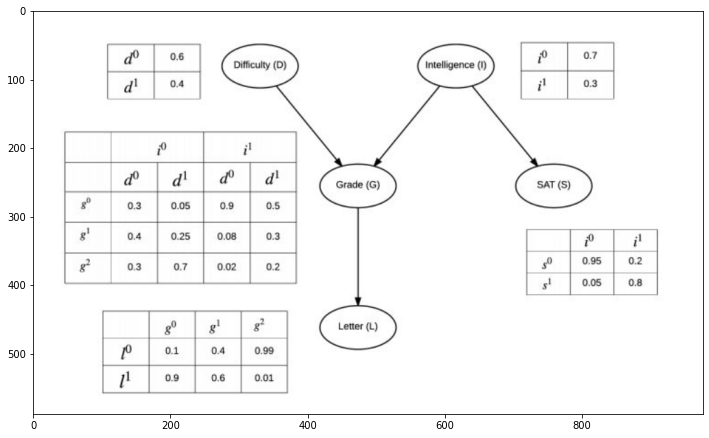

In [10]:
img = mpimg.imread('example.png')
plt.figure(figsize=(12, 12))
imgplot = plt.imshow(img)
plt.show()

In [11]:
# D => G, I => G, G => L, I => S
m = BayesianNetwork([('C', 'S'),
                               ('C', 'R'),
                               ('S', 'W'),
                               ('R', 'W')])

In [12]:
# 维度是按照variable 的相同的方向。 比如说Letter False => 那一行, Letter True =》 那一行

C_cpd = TabularCPD(
    variable='C', # 节点名称
    variable_card=2, # 节点取值个数
    values=[[0.2],[0.8]],
    # evidence=['I', 'D'], # 该节点的依赖节点
    # evidence_card=[2, 2] # 依赖节点的取值个数
)
 
S_cpd = TabularCPD(
    variable='S', # 节点名称
    variable_card=2,# 节点取值个数
    values=[[0.5, 0.9], [0.5,0.1]], # 该节点的概率表 # 注意这个地方的问题
    evidence=['C'], # 该节点的依赖节点
    evidence_card=[2] # 依赖节点的取值个数
)

R_cpd = TabularCPD(
    variable='R',# 节点名称
    variable_card=2,# 节点取值个数
    values=[[0.8,0.2], [0.2,0.8]], # 该节点的概率表# 注意这个地方的问题
    # 无依赖
    evidence=['C'],
    evidence_card=[2]
)

W_cpd = TabularCPD(
    variable='W',# 节点名称
    variable_card=2,# 节点取值个数
    values=[[1.0, 0.1,0.1,0.01],[0.0,0.9,0.9,0.99]], # 该节点的概率表
    evidence=['S','R'],# 该节点的依赖节点
    evidence_card=[2,2] # 依赖节点的取值个数
)
 


In [13]:

#将包含概率表的各节点添加到模型中：
m.add_cpds(
    C_cpd, 
    S_cpd,
    R_cpd,
    W_cpd,
)

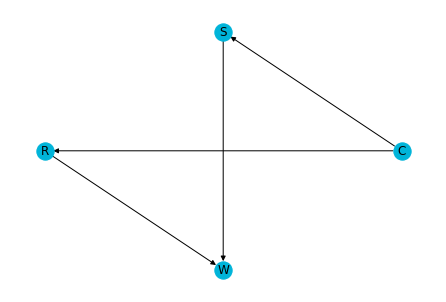

In [14]:
pos = nx.circular_layout(m)
nx.draw(m, node_color='#00b4d9', pos= pos,with_labels=True)

In [21]:
student_infer = BeliefPropagation(m)
 
 
prob_G = student_infer.query(
            variables=['S'],
            )
print(prob_G)

  0%|          | 0/3 [00:00<?, ?it/s]

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8200 |
+------+----------+
| S(1) |   0.1800 |
+------+----------+
